In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75*X[:,0] +3. + np.random.normal(0, 10, size=100)

In [3]:
from playML.PCA import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [4]:
pca.components_

array([[ 0.76246411,  0.64703051],
       [ 0.64703311, -0.7624619 ]])

In [5]:
pca = PCA(n_components=1)
pca.fit(X)
X_reduction = pca.transform(X)
X_reduction.shape


(100, 1)

In [6]:
X_resore = pca.inverse_transform(X_reduction)
X_resore.shape

(100, 2)

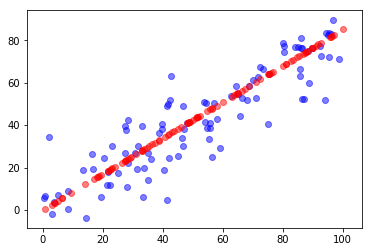

In [7]:
plt.scatter(X[:,0],X[:,1], color="b", alpha = 0.5)
plt.scatter(X_resore[:,0],X_resore[:,1],color = "r", alpha = 0.5)
plt.show()

## sklearn 中的PCA

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
pca.components_  

array([[-0.76246396, -0.64703068]])

In [10]:
X_reduction = pca.transform(X)
X_reduction.shape

(100, 1)

In [11]:
X_resore = pca.inverse_transform(X_reduction)
X_resore.shape

(100, 2)

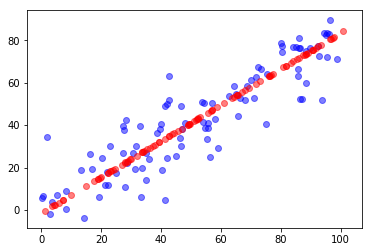

In [12]:
plt.scatter(X[:,0],X[:,1], color="b", alpha = 0.5)
plt.scatter(X_resore[:,0],X_resore[:,1],color = "r", alpha = 0.5)
plt.show()

# sklearn - PCA

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [14]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
X_train.shape

(1203, 64)

In [33]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

Wall time: 16 ms


In [34]:
knn_clf.score(X_test, y_test)

0.9932659932659933

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [37]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

Wall time: 2 ms


In [38]:
knn_clf.score(X_test_reduction, y_test) # 识别度降低太多，维度应该增加

0.6245791245791246

In [39]:
pca.explained_variance_ratio_

array([0.14906033, 0.13711025])

In [40]:
pca  = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.49060327e-01, 1.37110253e-01, 1.18896256e-01, 8.52238301e-02,
       5.59432734e-02, 4.96524325e-02, 4.26256540e-02, 3.60175588e-02,
       3.32977552e-02, 3.05604252e-02, 2.39982921e-02, 2.32951475e-02,
       1.85001662e-02, 1.75518727e-02, 1.49922780e-02, 1.44742428e-02,
       1.31711882e-02, 1.18575006e-02, 1.00904413e-02, 9.34843006e-03,
       9.00568293e-03, 7.94371489e-03, 7.35480964e-03, 7.20014554e-03,
       6.65892059e-03, 6.03394635e-03, 5.71407472e-03, 5.00429999e-03,
       4.71534259e-03, 4.28656437e-03, 3.84584082e-03, 3.43320654e-03,
       3.30766994e-03, 3.23037248e-03, 2.95751398e-03, 2.92859526e-03,
       2.49955872e-03, 2.31499597e-03, 2.19715881e-03, 2.13179170e-03,
       1.84225789e-03, 1.54849595e-03, 1.47284379e-03, 1.36264847e-03,
       1.15494113e-03, 1.07561408e-03, 9.36360533e-04, 8.31239075e-04,
       5.27114632e-04, 3.71302973e-04, 2.00287041e-04, 7.89507806e-05,
       6.01162161e-05, 4.68326838e-05, 2.92081036e-05, 1.72438587e-05,
      

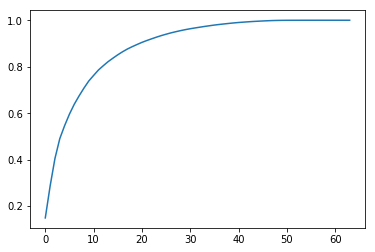

In [41]:
plt.plot([i for i in range(X_train.shape[1])],
        [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])
plt.show()

In [42]:
pca = PCA(0.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [43]:
pca.n_components_

28

In [44]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [45]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

Wall time: 6.09 ms


In [46]:
knn_clf.score(X_test_reduction, y_test) 

0.98989898989899